# Departamento de Engenharia de Teleinformática

# Computação Numérica / Métodos Numéricos

# Tarcisio Ferreira Maciel, Dr.-Ing. (Professor: [maciel@ufc.br](mailto:maciel@ufc.br))

# Darlan Cavalcante Moreira, M.Sc. (Colaborador: [darlan@gtel.ufc.br](mailto:darlan@gtel.ufc.br))

## Identificação do aluno

Nome: Caio Cid Santiago Barbosa

Matrícula: 378596

## Instruções

As questões abaixo devem ser resolvidas aqui mesmo no **Jupyter Notebook** e podem envolver tanto soluções escritas em markdown (veja sintaxe para markdown [aqui](https://daringfireball.net/projects/markdown/basics)), como soluções em código. A questão 0 abaixo serve de exemplo de como as questões devem ser resolvidas.

<div class="alert alert-warning">
**Dica:** em células markdown vocês podem usar dois espaços para criar uma quebra de linha.
</div>

----

## Questão 0

Para entender como as questões devem ser resolvidas, faça:

1. Em que país estamos?
2. Implemente uma função que retorne o dobro da entrada


## Solução de 0

<!-- Não apague o div -->
<div class="solucao alert alert-success">

Estamos no Brasil.

<!-- Não apague o div -->
</div>

In [1]:
# Solução de 2: Implementação em python
def dobro(x):
    return 2 * x

----

## Informações de entrada
Em comunicações móveis, a distorção de pequena escala introduzida pelo meio em um canal de comunicação sem fio pode ser modelada como um ganho $g(t)$ variante no tempo que afeta multiplicativamente o sinal $s(t)$ que trafega através do canal. O ganho do desvanecimento de pequena escala segue uma distribuição Rayleigh e pode ser simulado utilizando diferentes modelos. Um modelo bastante utilizado é o modelo de Jakes no qual
$
    g(t) = \vert h(t) \vert^2 = \left\vert \frac{1}{\sqrt{L}}\sum\limits_{l = 0}^{L-1} \exp( j ( 2\pi f_{D} \cos(\phi_l) t + \varphi_l ) ) \right\vert^2,
$
onde:
- $L$ é o número de multi-percursos do canal (raios ou caminhos através do qual réplicas do sinal transmitido chegam até o receptor);
- $f_D$ é o máximo desvio de frequência Doppler, dado por $f_D = \dfrac{v f_c}{c}$, onde $v$ é a velocidade do terminal móvel em m/s, $f_c$ é a frequência da portadora em Hz, e $c$ é a velocidade da luz em m/s;
- $\phi_l$ e $\varphi_l$ são variáveis aleatórias uniformemente distribuídas no intervalo $[0, 2\pi)$.

A função abaixo gera o ganho do canal para um *array* `numpy` de tempo $t$ e demais parâmetros físicos do modelo do canal ($L$, $f_c$, e $v$).

In [36]:
%matplotlib notebook
# Note que não foi feita nenhuma checagem de erros
import numpy as np
import matplotlib.pyplot as plt
def Jakes(t, f_c, v, L):
    # f_c é dada em Hertz
    # v é dada em m/s
    # c é 3 x 10^8 m/s
    c = 3e8;
    # Gera as fases aleatórias entre [0, 2*pi]
    Phi = np.pi * np.random.random(L);
    phi = np.pi * np.random.random(L);
    # Calcula o máximo desvio Doppler
    f_D = v*f_c/c
    # Calcula g usando uma python list comprehension
    g = np.array( [ np.abs((1/np.sqrt(L))*np.sum(np.exp(1j*(2*np.pi*f_D*np.cos(Phi)*x + phi))))**2 for x in t ] )
    return g

<IPython.core.display.Javascript object>


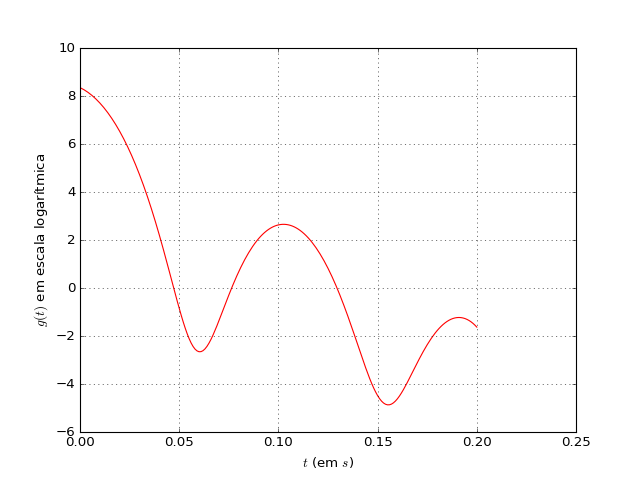

<IPython.core.display.Javascript object>


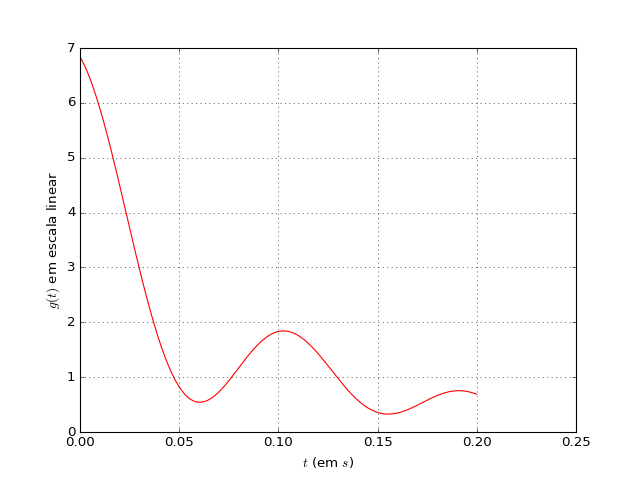

In [37]:
# Chama a função acima para gerar 201 amostras de um canal aleatório
t = np.linspace(0, 0.2, 201); # Gera um array numpy com 201 amostras uniformemente espaçadas de 1e-3
f_c = 2e9; # Frequência do sistema é de 2 GHz
v = 3/3.6; # Velocidade do móvel de 3 km/h (pedestre)
L = 20;    # O canal possui 20 multi-percursos
# Gera as amostras do canal
g = Jakes(t, f_c, v, L)
# Plota o gráfico do ganho do canal em função do tempo (eixo y em escala logarítmica)
plt.figure(1);
plt.plot(t, 10*np.log10(g), 'r-')
plt.grid()
plt.ylabel('$ g(t) $ em escala logarítmica')
plt.xlabel('$t$ (em $s$)')
plt.show()
# Plota o gráfico do ganho do canal em função do tempo (eixo y em escala normal)
plt.figure(2);
plt.plot(t, g, 'r-')
plt.grid()
plt.ylabel('$ g(t) $ em escala linear')
plt.xlabel('$t$ (em $s$)')
plt.show()

----

## Questão 1
Utilize a função `Jakes` fornecida anteriormente para gerar 05 amostras de canal para $t = 0, 20, 40, 60$ e $80$ ms, ou seja, gere os pares ordenados $(0, g(0))$, $(20 \times 10^{-3}, g(20\times 10^{-3}))$, $(40\times 10^{-3}, g(40\times 10^{-3}))$, $(60\times 10^{-3}, g(60\times 10^{-3}))$, $(80\times 10^{-3}, g(80\times 10^{-3}))$. Para esses 05 pares ordenados $(x_i, y_i)$, calcule os coeficientes do polinômio interpolador de quarta ordem resolvendo o sistema de 05 equações $p(x_i) = y_i$ para $i = 1, 2, 3, 4$ e $5$, implementando para tanto o método da eliminação de Gauss. Plote num mesmo gráfico os valores de $g(t)$ e os valores de seu $p(t)$ para $t = 0$ até $80$ ms com passo de $1$ ms.

<IPython.core.display.Javascript object>


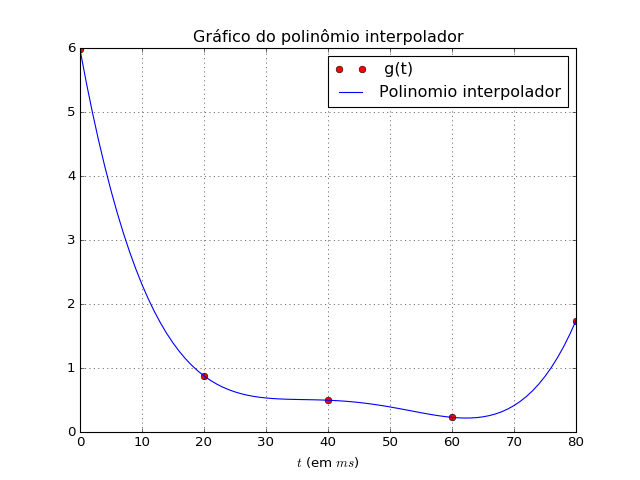

In [38]:
# Implemente sua solução aqui acompanhada de um exemplo de uso.

def Gauss(a,b):
    ab = np.zeros((len(a),len(a[0])+1))
    
    #Criando a matriz estendida para resolução do sistema
    for i in range(0,len(ab)):
        ab[i] = np.append(a[i],b[i])
    
    #Escalonamento  
    for j in range(0, len(ab[0])-1):
        for i in range(j+1,len(ab)):
            m = ab[i][j]/ab[j][j]
            for p in range(0,len(ab[i])):
                ab[i][p] = ab[i][p] - m*ab[j][p]
    
    #Substituicao
    x = np.zeros(len(ab))    
    
    for i in range(len(ab)-1,-1,-1):
        x[i] = ab[i][len(ab[i])-1]/ab[i][i]
        for j in range(0,len(x)):
            if i!=j:
                x[i] = x[i] - ((ab[i][j]*x[j])/ab[i][i])

    return x

#Variaveis
f_c = 2e9 # Frequência do sistema é de 2 GHz
v = 3/3.6 # Velocidade do móvel de 3 km/h (pedestre)
L = 20    # O canal possui 20 multi-percursos
grau = 4

# Gera as amostras do canal
t = np.array([0,20,40,60,80])
g = Jakes(t, f_c, v, L)

#Gerando a matriz dos coeficientes para resolução via Gauss.
x = np.zeros((len(t),grau+1))
for i in range(0,len(x)):
    for j in range(0, grau+1):
        x[i][j] = t[i]**j

pol = Gauss(x,g)

tpol = np.arange(0,81,1)

plt.figure(3)
plt.plot(t, g, 'ro', label = ' g(t) ')
plt.plot(tpol, (pol[4]*tpol**4 + pol[3]*tpol**3 + pol[2]*tpol**2 + pol[1]*tpol**1 + pol[0]*tpol**0), 'b-', label = 'Polinomio interpolador' )
plt.legend()
plt.grid()
plt.xlabel('$t$ (em $ms$)')
plt.title('Gráfico do polinômio interpolador')
plt.show()

## Questão 2
Utilize a função `Jakes` fornecida anteriormente para gerar 05 amostras de canal para $t = 0, 10, 20, 30$ e $40$ ms. Escreva sua própria função `polyfit` para realizar a regressão polinomial e calcular os polinômios de primeira, segunda e terceira ordem que melhor se ajustam aos dados. Confira seus resultados utilizando a função `polyfit` padrão do `numpy`. Plote gráficos de seus polinômios regressores e dos dados reais da função `Jakes`.

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:42: RuntimeWarning: invalid value encountered in power


<IPython.core.display.Javascript object>


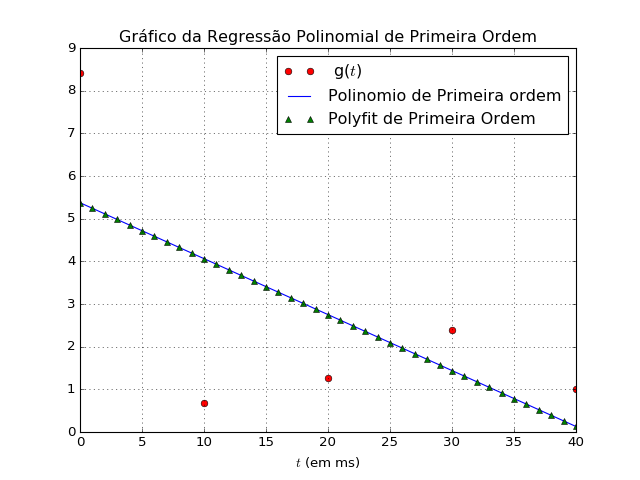

<IPython.core.display.Javascript object>


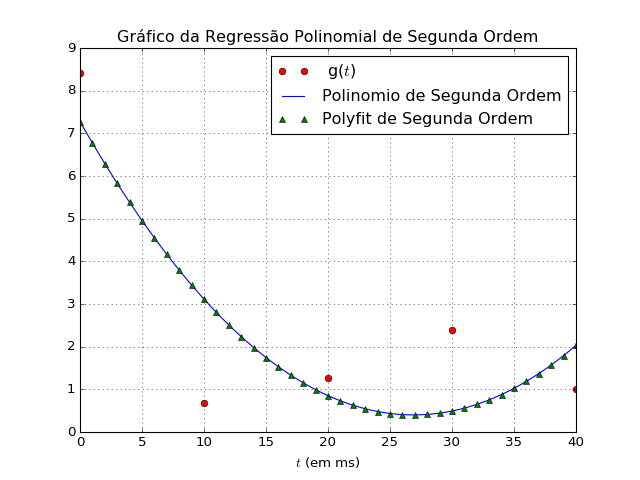

<IPython.core.display.Javascript object>


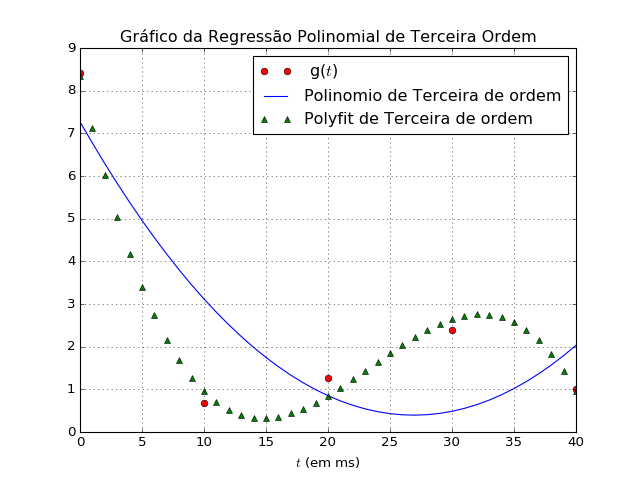

In [39]:
# Implemente sua solução aqui acompanhada de um exemplo de uso.
#
# Observaçao: A função perfeitamente utilizando o sistema operacional Linux (distro Ubuntu).
# Porém, por algum motivo não identificado, ocorre um erro rodando em Windowns (10.1). 
# O polinômio de terceira ordem apesar de possuir coeficientes a mais e diferentes do 
# polinomio de segunda ordem, adquire uma curva característica muito semelhante a ele,
# causando assim um erro.

def GaussMod(x): #GaussMod = Gauss recebendo matriz estendida => AB. 
    # A função não possui nenhuma diferença da função Gauss normal criada previamente,
    # além do parâmetro passado

    ab = x
    
    #Escalonamento  
    for j in range(0, len(ab[0])-1):
        for i in range(j+1,len(ab)):
            m = ab[i][j]/ab[j][j]
            for p in range(0,len(ab[i])):
                ab[i][p] = ab[i][p] - m*ab[j][p]
    
    #Substituicao
    x = np.zeros(len(ab))    
    
    for i in range(len(ab)-1,-1,-1):
        x[i] = ab[i][len(ab[i])-1]/ab[i][i]
        for j in range(0,len(x)):
            if i!=j:
                x[i] = x[i] - ((ab[i][j]*x[j])/ab[i][i])
    
    return x

def regressao(x,y,ordem):
    
    # Inicializando a matriz estendida para obtermos a matriz dos coeficientes.
    matrizest = np.zeros((ordem+1,ordem+2))

    # Aplicação da regressão propriamente dita. A ultima linha é deixada fora do laço
    # de j pois ela possui um padrão diferente das outras (utiliza y)
    for i in range(0,len(matrizest)):
        for j in range(0,len(matrizest[i]-1)):
            matrizest[i][j] = np.sum(x**(i+j))
        matrizest[i][len(matrizest[i])-1] = np.sum((x**i)*y)
    
    return matrizest


#Variaveis
f_c = 2e9 # Frequência do sistema é de 2 GHz
v = 3/3.6 # Velocidade do móvel de 3 km/h (pedestre)
L = 20    # O canal possui 20 multi-percursos
t = np.array([0,10,20,30,40])

g = Jakes(t, f_c, v, L)

primeira = GaussMod(regressao(t,g,1))
segunda = GaussMod(regressao(t,g,2))
terceira = GaussMod(regressao(t,g,3))

polyprimeira = np.polyfit(t,g,1)
polysegunda = np.polyfit(t,g,2)
polyterceira = np.polyfit(t,g,3)

tpol = np.arange(0,41,1)

plt.figure(4)
plt.plot(t, g, 'ro', label = ' g($t$) ')
plt.plot(tpol, (primeira[1]*tpol**1 + primeira[0]*tpol**0), 'b-', label = 'Polinomio de Primeira ordem' )
plt.plot(tpol, (polyprimeira[0]*tpol**1 + polyprimeira[1]*tpol**0) , 'g^', label = 'Polyfit de Primeira Ordem') 
plt.legend()
plt.grid()
plt.xlabel('$t$ (em ms)')
plt.title('Gráfico da Regressão Polinomial de Primeira Ordem')
plt.show()

plt.figure(5)
plt.plot(t, g, 'ro', label = ' g($t$) ')
plt.plot(tpol, (segunda[2]*tpol**2 + segunda[1]*tpol**1 + segunda[0]*tpol**0), 'b-', label = 'Polinomio de Segunda Ordem' )
plt.plot(tpol, (polysegunda[0]*tpol**2 + polysegunda[1]*tpol**1 + polysegunda[2]*tpol**0), 'g^', label = 'Polyfit de Segunda Ordem' )
plt.legend()
plt.grid()
plt.xlabel('$t$ (em ms)')
plt.title('Gráfico da Regressão Polinomial de Segunda Ordem')
plt.show()

plt.figure(6)
plt.plot(t, g, 'ro', label = ' g($t$) ')
plt.plot(tpol, (terceira[3]*tpol**3 + terceira[2]*tpol**2 + terceira[1]*tpol**1 + terceira[0]*tpol**0), 'b-', label = 'Polinomio de Terceira de ordem' )
plt.plot(tpol, (polyterceira[0]*tpol**3 + polyterceira[1]*tpol**2 + polyterceira[2]*tpol**1 + polyterceira[3]*tpol**0), 'g^', label = 'Polyfit de Terceira de ordem' )
plt.legend()
plt.grid()
plt.xlabel('$t$ (em ms)')
plt.title('Gráfico da Regressão Polinomial de Terceira Ordem')
plt.show()


## Questão 3
Utilize a função `Jakes` fornecida anteriormente para gerar 05 amostras de canal para $t = 0, 20, 40, 60, 80, 100$ e $120$ ms, ou seja, gere os pares ordenados $(0, g(0))$, $(20 \times 10^{-3}, g(20\times 10^{-3}))$, $(40\times 10^{-3}, g(40\times 10^{-3}))$, ..., $(120\times 10^{-3}, g(120\times 10^{-3}))$. Implemente uma função que calcule o polinômio interpolador de Newton para esse conjunto de pontos. Plote gráficos dos dados exatos e do polinômio interpolador para $x \in [0, 120]$ ms com passo de 1 ms. Para obter bônus nessa questão, sua função deve ser flexível o suficiente para funcionar com qualquer quantidade de pontos.

<IPython.core.display.Javascript object>


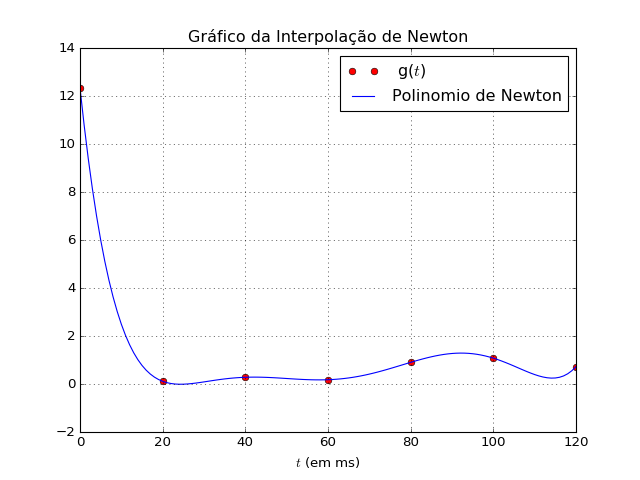

In [40]:
# Implemente sua solução aqui acompanhada de um exemplo de uso.
def interpNewton(x,y,t):
    
    # Parâmetros iniciais. Nota-se que todos os parâmetros são genéricos,
    # podendo ser utilizado com qualquer quantidade de pontos.
    N = len(x) #Qtd de pontos
    a = np.zeros(N) #Coeficientes do polinômio
    f = np.zeros((N,N)) #Matriz para calcular as diferenças divididas.
    
    # Atribuição da primeira linha da matriz das diferenças divididas
    for i in range (0,N):
        f[0][i] = y[i]
    
    # Atribuição da segunda linha da matriz das diferenças divididas
    for i in range(0,N-1):
            f[1][i] = (y[i+1] - y[i])/(x[i+1] - x[i])  
    
    # Atribuição do restantes das linhas da matriz das diferenças divididas
    for i in range(2,N):
        for j in range(0,N-i):
                f[i][j] = (f[i-1][j+1] - f[i-1][j]) / (x[i+j] - x[j])
    
    # Os primeiros elementos de cada linha corresponde ao coeficiente do
    # polinômio interpolador de newton. No laço abaixo apenas é atribuido
    # esse valor para cada um dos coeficientes.
    for i in range(0,N):
        a[i] = f[i][0]
    
    # Cálculo do polinomio interpolador propriamente dito.
    Yint = a[0]
    xn = 1
    for i in range(1,N):
        xn = xn*(t - x[i-1])
        Yint = Yint + a[i]*xn

    return Yint

#Variaveis
f_c = 2e9 # Frequência do sistema é de 2 GHz
v = 3/3.6 # Velocidade do móvel de 3 km/h (pedestre)
L = 20    # O canal possui 20 multi-percursos
t = np.arange(0,121,20)

g = Jakes(t, f_c, v, L)

tpol = np.arange(0,121,1.)

plt.figure(7)
plt.plot(t, g, 'ro', label = ' g($t$) ')
plt.plot(tpol, interpNewton(t,g,tpol), 'b-', label = 'Polinomio de Newton' )
plt.legend()
plt.grid()
plt.xlabel('$t$ (em ms)')
plt.title('Gráfico da Interpolação de Newton')
plt.show()

## Questão 4
Utilize a função `Jakes` fornecida anteriormente para gerar 05 amostras de canal para $t = 0, 20, 40, 60, 80, 100$ e $120$ ms, ou seja, gere os pares ordenados $(0, g(0))$, $(20 \times 10^{-3}, g(20\times 10^{-3}))$, $(40\times 10^{-3}, g(40\times 10^{-3}))$, ..., $(120\times 10^{-3}, g(120\times 10^{-3}))$. Implemente a interpolação por *splines* cúbicas naturais para o conjunto de dados fornecido. Plote gráficos dos dados exatos e das *splines* para $x \in [0, 120]$ ms com passo de 1 ms. Considere as mesmas condições estabelecidas na seção 5.6.3 do livro *Métodos Numéricos para Engenheiros e Cientistas* de *Amos Gilat & Vish Subramaniam*. Para obter bônus nesse item, sua função deve ser flexível o suficiente para funcionar com qualquer quantidade de pontos.


<IPython.core.display.Javascript object>


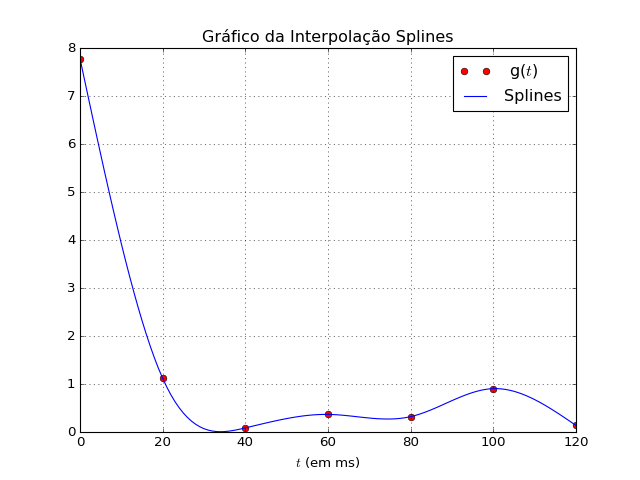

In [42]:
# Implemente sua solução aqui acompanhada de um exemplo de uso.

def splines(x,y,t):
    
    # Polinomios interpoladores splines propriamente ditos.
    def f(a,x,y,i,t):
        termo1 = (a[i]/(6*(x[i+1]-x[i])))*((x[i+1] - t)**3)
        termo2 = (a[i+1]/(6*(x[i+1]-x[i])))*((t - x[i])**3)
        termo3 = ((y[i]/(x[i+1]-x[i])) - ((a[i]*(x[i+1]-x[i]))/6)) * (x[i+1] - t)
        termo4 = ((y[i+1]/(x[i+1]-x[i])) - ((a[i+1]*(x[i+1]-x[i]))/6)) * (t - x[i])
        return termo1 + termo2 + termo3 + termo4
    
    n = len(x)
    a = np.zeros(n)
    a[0] = 0 #Atribuição do primeiro coeficiente devido as condições estabelescidas
    a[n-1] = 0 #Atribuição do último coeficiente devido as condições estabelescidas
    
    # Inicialização da matriz dos coeficientes que restam ser definidos (Dois já
    # foram estabelescidos). No caso, nas primeiras quatro linhas é calculada a
    # primeira equação linear para acharmos os coeficientes dos polinômios, que não
    # pode ser colocada no laço geral pois possui apenas dois fatores não nulos. Já 
    # nas 4 linhas depois do laço geral (que vai de 1 a n-3), calculamos a ultima
    # linha, que também possui apenas 2 fatores não nulos.
    
    # Primeira linha
    matriz = np.zeros((n-2,n-1))
    matriz[0][0] = 2*((x[1] - x[0])+(x[2] - x[1]))
    matriz[0][1] = (x[2] - x[1])
    matriz[0][len(matriz[0])-1] = 6* (((y[2]-y[1])/(x[2]-x[1]))-((y[1] - y[0])/(x[1] - x[0])))
    
    # Laço geral
    for i in range(1,n-3):
        matriz[i][i-1] = (x[i+1] - x[i])
        matriz[i][i] = 2*((x[i+1] - x[i])+(x[i+2] - x[i+1]))
        matriz[i][i+1] = (x[i+2] - x[i+1])
        matriz[i][len(matriz[i])-1] = 6*(((y[i+2]-y[i+1])/(x[i+2]-x[i+1]))-((y[i+1] - y[i])/(x[i+1] - x[i]))) 
    
    # Ultima linha
    matriz[n-3][n-4] = (x[n-2] - x[n-3])
    matriz[n-3][n-3] = 2*((x[n-2] - x[n-3])+(x[n-1] - x[n-2]))
    matriz[n-3][n-2] = 6*(((y[n-1]-y[n-2])/(x[n-1]-x[n-2]))-((y[n-2] - y[n-3])/(x[n-2] - x[n-3]))) 
    
    # Utiliza-se Gauss, já feito previamente, para resolver a matriz 
    # dos coeficientes calculada previamente.
    temp = GaussMod(matriz)
    
    # Atribuindo o resultado dos coeficientes achado com Gauss 
    # aos 2 já estabelescidos.
    for i in range(1,n-1):
        a[i] = temp[i-1]
    
    # Aplicando os valores de t a spline correspondente.
    temp = np.zeros(len(t))
    for j in range(0,len(t)):
        for i in range(0,n-1):
            if t[j]<=x[i+1] and t[j]>=x[i]:
                temp[j] = f(a,x,y,i,t[j])
            
    return temp
    

#Variaveis
f_c = 2e9 # Frequência do sistema é de 2 GHz
v = 3/3.6 # Velocidade do móvel de 3 km/h (pedestre)
L = 20    # O canal possui 20 multi-percursos
t = np.arange(0,121,20.)

g = Jakes(t, f_c, v, L)

tpol = np.arange(0,121,1)

plt.figure(8)
plt.plot(t, g, 'ro', label = ' g($t$) ')
plt.plot(tpol, splines(t,g,tpol), 'b-', label = 'Splines' )
plt.legend()
plt.grid()
plt.xlabel('$t$ (em ms)')
plt.title('Gráfico da Interpolação Splines')
plt.show()
        

----

# Aparência do Notebook

A célula abaixo contém código cuja única finalidade é modificar a aparência do notebook após a célula ser executada.

In [8]:
from IPython.core.display import HTML, display

# O arquivo styles.css deve estar na mesma pasta que o notebook
def css_styling():
    try:
        styles = open("./styles.css", "r").read()
        html = "<style>{0}</style>".format(styles)
    except FileNotFoundError:
        html = "<b style=\"font-size: 25px\">Arquivo 'styles.css' não encontrado</b>"
    return HTML(html)
display(css_styling())